## EXPERIMENT 1.1: AdaFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *


from IPython import embed


In [2]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/ada_1_1/'


### AdaFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

In [3]:
feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/1.1/similarity_scores_children_filtered_bibel_FINAL_INFERENCE_baseline1.pt'
feature_list_adults = '../../data/data_full/feature_vectors/adaface_feature_vectors/1.1/similarity_scores_adults_bibel_cropped_resized_retina_baseline1.pt'


image_names_c, ids_c, num_ids_c, norm_feats_c = load_adaface_vectors(feature_list_children)
image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors(feature_list_adults)
# image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors_adults(feature_list_adults) # virker for den gamle, men ikke de cropped af en eller anden grund

ids_a = ["_".join(x.split("_")[1:]) for x in ids_a]


# Similarity matrices from adaface - all
sim_mat_c = np.dot(norm_feats_c, norm_feats_c.T)
sim_mat_a = np.dot(norm_feats_a, norm_feats_a.T)


# def neighborhood_aware_cosine(norm_feats, k=5):
#     # Step 1: Compute Cosine Similarity Matrix
#     cosine_sim = np.dot(norm_feats, norm_feats.T)

#     # Step 2: Apply NAC to each element
#     NAC_sim = np.zeros_like(cosine_sim)
#     num_samples = norm_feats.shape[0]

#     for i in range(num_samples):
#         # Get top-k neighbors for each probe
#         top_k_indices = np.argsort(-cosine_sim[i])[:k]
#         denominator = np.sum(np.exp(cosine_sim[i, top_k_indices]))

#         for j in range(num_samples):
#             if j in top_k_indices:
#                 NAC_sim[i, j] = np.exp(cosine_sim[i, j]) / denominator

#     return NAC_sim

# sim_mat_c = neighborhood_aware_cosine(norm_feats_c, k=5)
# sim_mat_a = neighborhood_aware_cosine(norm_feats_a, k=5)





# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

In [6]:
sim_mat_c.shape

(7571, 7571)

# Finding the right threshold

In [10]:
random_states = [1]
percentiles = np.arange(0.0, 1.0, 0.01).tolist()

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 15162 14367
NOT SAME LENGTH 1516

KeyboardInterrupt: 

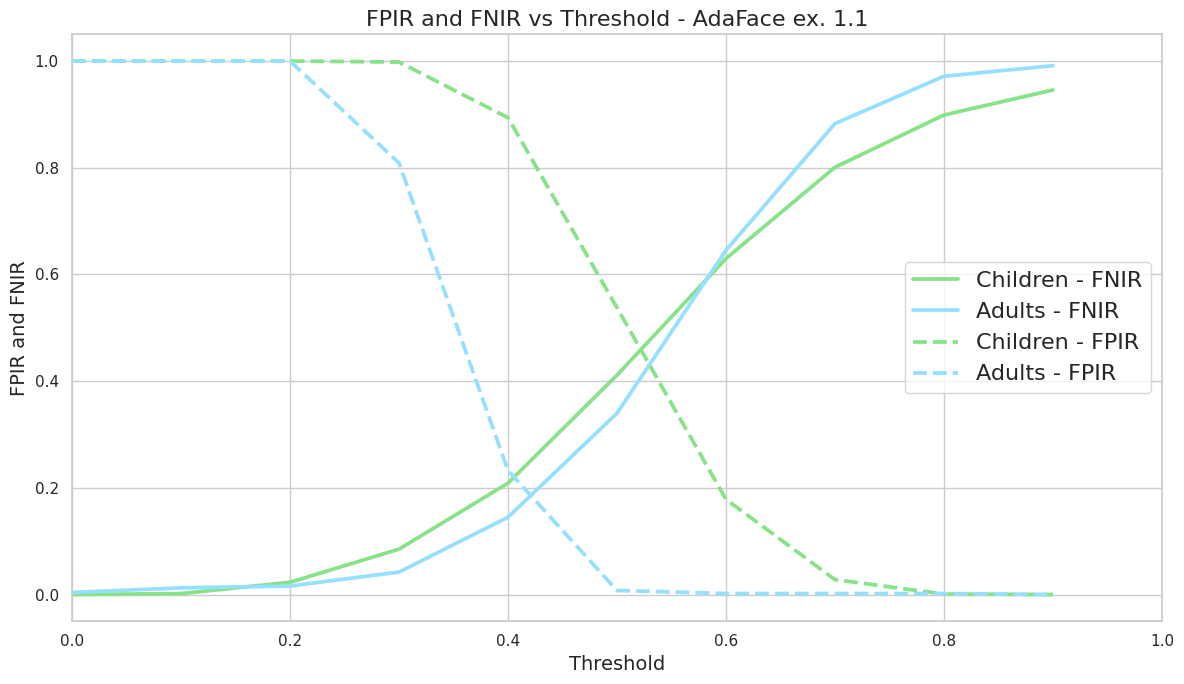

In [6]:

plot_threshold_metrics_ex_1_1_together(df_all_threshold_x,  'AdaFace ex. 1.1', save_fig_path)


# Stats

In [14]:

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)

df_all_results.describe().applymap(lambda x: f"{x:.3f}")

FPD result:  0.29199770502759903
FND result:  0.14586074805604693
GARBE result, GARBE close to 1 means more unfair:  0.18239498729893494
done
FPD result:  0.45025188870884303
FND result:  0.14773648715463877
GARBE result, GARBE close to 1 means more unfair:  0.22336533754318982
done
FPD result:  0.3382264627601705
FND result:  0.1798463063956371
GARBE result, GARBE close to 1 means more unfair:  0.21944134548677047
done
FPD result:  0.352141495009441
FND result:  0.12037090199230636
GARBE result, GARBE close to 1 means more unfair:  0.17831355024659
done
FPD result:  0.2724210057973586
FND result:  0.1578647938164555
GARBE result, GARBE close to 1 means more unfair:  0.18650384681168128
done
FPD result:  0.3852835513497301
FND result:  0.10518812101379635
GARBE result, GARBE close to 1 means more unfair:  0.17521197859777976
done
FPD result:  0.33915960887828084
FND result:  0.17658644872194973
GARBE result, GARBE close to 1 means more unfair:  0.21722973876103252
done
FPD result:  0.3

/tmp/ipykernel_47300/1846840031.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.049,0.025,1.000,0.945,0.373,0.168,0.220,0.267
std,3.028,0.004,0.005,0.000,0.006,0.068,0.042,0.040,0.000
min,1.000,0.043,0.018,1.000,0.938,0.272,0.105,0.175,0.267
25%,3.250,0.048,0.022,1.000,0.941,0.338,0.146,0.183,0.267
50%,5.500,0.049,0.023,1.000,0.943,0.368,0.167,0.218,0.267
75%,7.750,0.052,0.030,1.000,0.951,0.427,0.190,0.247,0.267
max,10.000,0.057,0.031,1.000,0.956,0.477,0.243,0.279,0.267


In [ ]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


In [ ]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

# Stats

In [ ]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Gemmer simscores

In [17]:

sim_mat_c_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all_ada.csv', index=False)
# Print the big array
print(len(sim_mat_c_enrolled_iterations_all))

sim_mat_a_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all_ada.csv', index=False)


# Print the big array
print(len(sim_mat_a_enrolled_iterations_all))

sim_mat_c_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all_ada.csv', index=False)
# Print the big array
print(len(sim_mat_c_non_enrolled_iterations_all))


sim_mat_a_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all_ada.csv', index=False)

# Print the big array
print(len(sim_mat_a_non_enrolled_iterations_all))


121256
41438


# Loader sim scores

In [19]:
sim_mat_c_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_enrolled_iterations_all_ada.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_enrolled_iterations_all_ada.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_ada.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_ada.csv')).values.flatten()


In [20]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [21]:
mated_scores1 = sim_mat_a_enrolled_iterations_all_ada
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all_ada
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,41438.000000,3.237123e+07
1,Minimum,-0.127076,-4.138602e-01
2,Maximum,0.952069,8.744552e-01
3,Mean,0.585216,1.417561e-02
4,St. Dev.,0.135483,8.720514e-02
5,Skewness,-0.537410,3.281414e-01
6,Ex. Kurtosis,1.495607,4.662831e-01


In [22]:
mated_scores2 = sim_mat_c_enrolled_iterations_all_ada
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all_ada
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,121256.000000,3.275105e+07
1,Minimum,0.030712,-3.562537e-01
2,Maximum,0.998967,9.998881e-01
3,Mean,0.583003,1.374232e-01
4,St. Dev.,0.151178,1.173985e-01
5,Skewness,-0.209160,3.989444e-01
6,Ex. Kurtosis,-0.022230,2.163939e-01


In [23]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [27]:

import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram"):
    def normalise_scores(distribution):
        return np.ones_like(distribution) / len(distribution)

    mated_mean = np.mean(mated_scores)

    plt.figure(figsize=(10, 6))  # Replace 'figure_size' with a specific size if not defined

    if normalise:
        plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')  # Replace 'mated_label' with 'Mated Scores'
        plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')  # Replace 'nonmated_label' with 'Non-mated Scores'
        ylabel = "Probability Density"
    else:
        plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
        plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
        ylabel = "Count"

    plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

    plt.xlabel("Comparison Score", size=16)
    plt.ylabel(ylabel, size=16)
    plt.title(title, size=20)
    plt.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=14)  # Adjust legend parameters as needed

    if savename is not None:
        plt.savefig(savename, bbox_inches="tight")
        plt.cla()
        plt.clf()
        plt.close()
    else:
        plt.show()


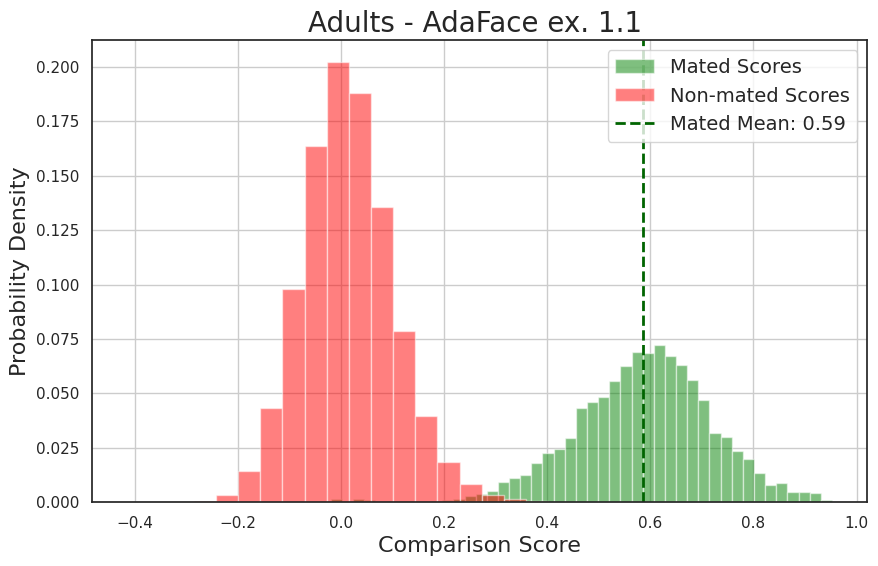

In [28]:

plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - AdaFace ex. 1.1 ', save_fig_path=save_fig_path)


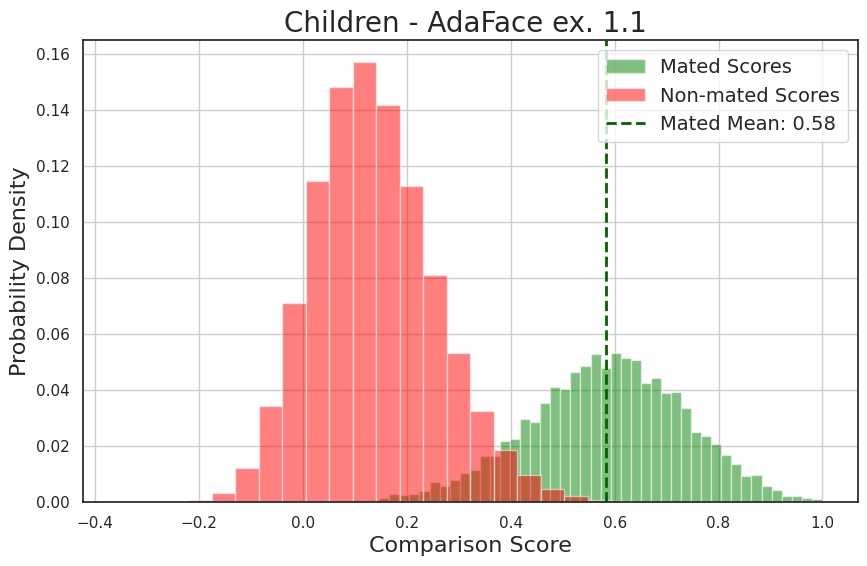

In [29]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - AdaFace ex. 1.1 ', save_fig_path=save_fig_path)


# DET curves


In [30]:
from DET_utils.DET_plots import *

In [29]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


d' child = 5.01223
d' adult = 3.16811


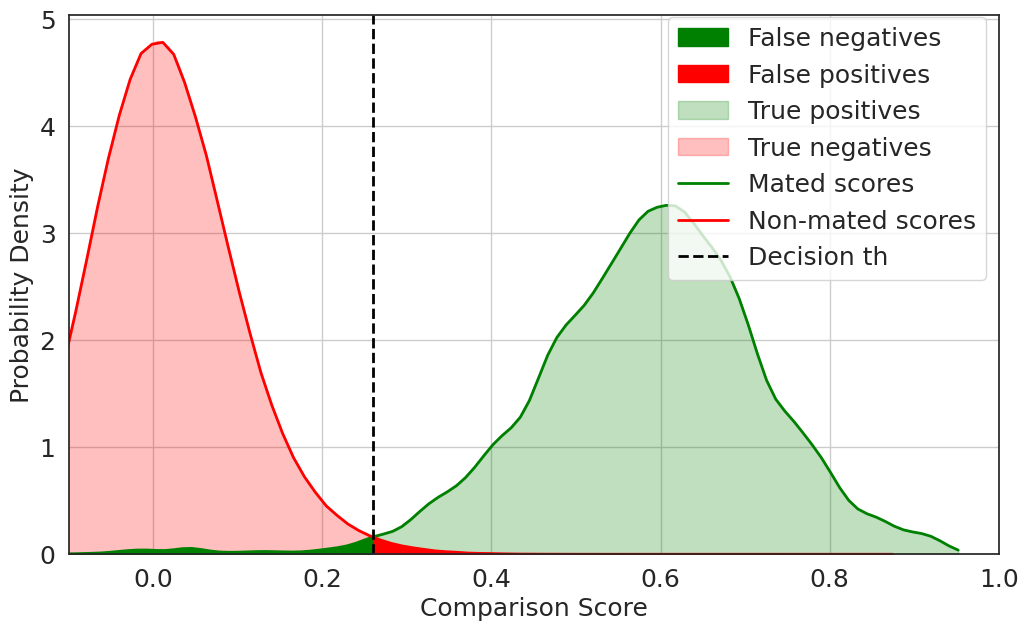

In [32]:
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='Adults - AdaFace ex. 1.1')

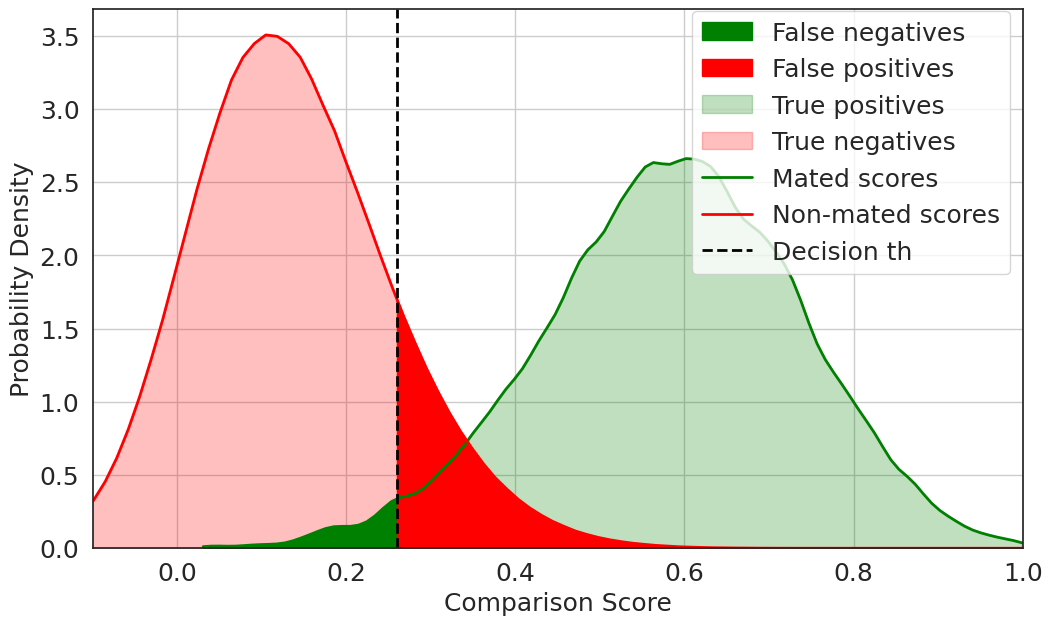

In [33]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='Children - AdaFace ex. 1.1')

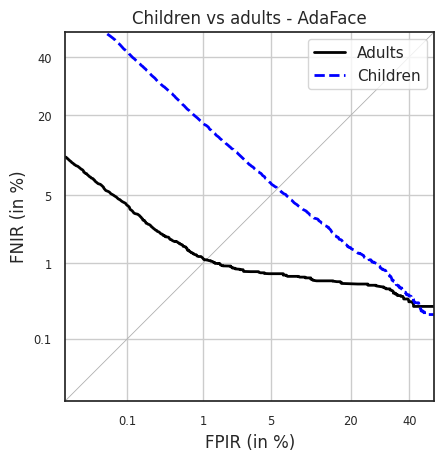

In [35]:
def DET_plotting_1_1(title = 'Adults vs Children - MagFace ex. 2.2', save_fig_path= 'save_fig_path'):
    figure_size = (12,7)
    alpha_shade = 0.25
    alpha_fill = 1.0
    linewidth = 2
    legend_loc = "upper left"
    legend_anchor = (1.0, 1.02)
    legend_cols = 1
    legend_fontsize = 18
    label_fontsize = 18
    tick_fontsize = 18
    system_name1 = 'Adults'
    system_name2 = 'Children'

    det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True, plot_title=title)
    det.x_limits = np.array([1e-5, .8])
    det.y_limits = np.array([1e-5, .8])
    det.x_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
    det.x_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
    det.y_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
    det.y_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
    det.create_figure()
    det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
    det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
    det.legend_on(loc="upper right")


DET_plotting_1_1('Adults vs Children - AdaFace ex. 1.1', save_fig_path= save_fig_path)